In [23]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graphviz

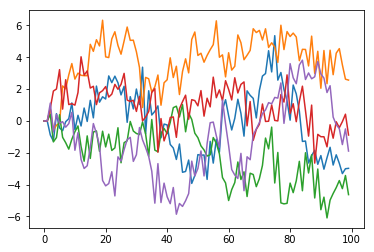

In [24]:
T, n = 100, 5
y = np.zeros((T, n))
beta0 = .45 + np.random.rand(2, n)*.1

for i in range(2, T):
    y[i] = beta0[0] * y[i-1] + beta0[1] * y[i-2] + np.random.randn(n)

plt.plot(y);

In [37]:
class Lasso_Granger(object):
    """docstring for model1"""
    def __init__(self,data,lag,number_of_features,number_of_observations,is_simulated = False):
        super(Lasso_Granger, self).__init__()
        assert(lag < number_of_observations)
        assert(data.shape[0]==number_of_features and data.shape[1]==number_of_observations)
        self.lag = lag
        self.number_of_features = number_of_features
        self.number_of_observations = number_of_observations
        self.true_data = data
        
        new_data = np.zeros((number_of_observations-lag, number_of_features*lag))
        #print(new_data.shape)
        for i in range(lag,number_of_observations):
            for j in range(number_of_features):
                new_data[i-lag][j*lag:(j+1)*lag] = data[j][i-lag:i]
                
        self.processed_data = new_data
        
    
    def fit_model(self,hyperparam=0.1,method='LASSO'):
        
        node = range(self.number_of_features)
        dir_edge = set([])
        undir_edge = set([])
        beta_feature = []
        for feature in range(self.number_of_features):
            clf = linear_model.Lasso(alpha=hyperparam)
            clf.fit(self.processed_data,self.true_data[feature][self.lag:])
            beta_feature.append(clf.coef_)
        beta_feature = np.array(beta_feature)
        
        for y in range(self.number_of_features):    
            for x in range(self.number_of_features):
                #print(y,x)
                if x!=y:
                    beta_part_x = beta_feature[y][x*self.lag:((x+1)*self.lag)]
                    beta_part_y = beta_feature[x][y*self.lag:((y+1)*self.lag)]

                    if np.any(beta_part_x)==True and np.any(beta_part_y)==False:
                        dir_edge.add((x,y))
                    elif np.any(beta_part_y)==True and np.any(beta_part_x)==False:
                        dir_edge.add((y,x))
                    elif np.any(beta_part_y)==True and np.any(beta_part_x)==True:
                        if (x,y) not in undir_edge and (y,x) not in undir_edge:
                            undir_edge.add((x,y))
                
        return node, dir_edge, undir_edge  
        #dot = graphviz.Digraph()   
        
        
        
        
        

In [40]:
Model = Lasso_Granger(y.T,2,n,T)
node, dir_edge, undir_edge = Model.fit_model()

(98, 10)


In [76]:
g = graphviz.Digraph()
for ed in dir_edge:
    g.edge(str(ed[0]),str(ed[1]),color='blue')
for ed in undir_edge:
    g.edge(str(ed[0]),str(ed[1]),color='red',arrowhead=None)
#     g.edge(str(ed[1]),str(ed[0]),color='red')

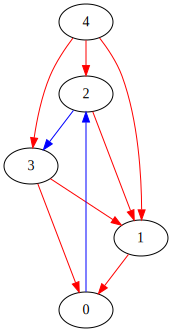

In [77]:
g